In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances

# KNN classification and regression

## 1. generate dataset


In [ ]:
blue_points = np.random.uniform(low=[0, 0], high=[8, 6], size=(6, 2))

# no points in green and red at the same time
def generate_unique_red_points(num_points, blue_points):
    red_points = []
    while len(red_points) < num_points:
        candidate = np.random.uniform(low=[0, 0], high=[8, 6], size=(1, 2))
        if not np.any(np.all(np.isclose(candidate, blue_points, atol=1e-2), axis=1)):
            red_points.append(candidate[0])
    return np.array(red_points)


red_points = generate_unique_red_points(5, blue_points)

blue_labels = np.zeros(len(blue_points), dtype=int)
red_labels = np.ones(len(red_points), dtype=int)

X = np.vstack([blue_points, red_points])
y = np.hstack([blue_labels, red_labels])

x_left, x_right, y_low, y_upper = -0.1, 8.1, -0.1, 6.1

## 2. compare decision boundary b\w Cartesian and polar coordinates

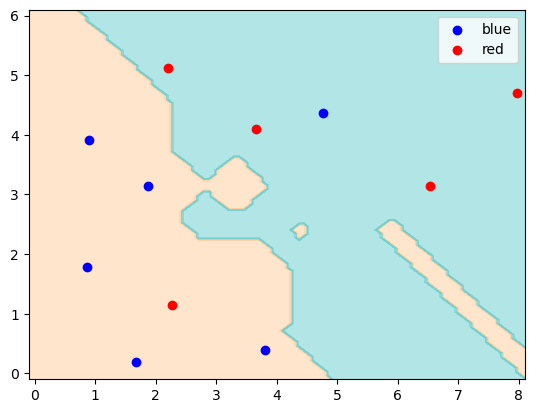

In [4]:
# change different knn below, and get corresponding norm
knn = KNeighborsClassifier(n_neighbors=3) # L2
knn = KNeighborsClassifier(p =1, n_neighbors=3) # L1
knn = KNeighborsClassifier(metric='chebyshev', n_neighbors=3) # L∞

knn.fit(X, y)

def plot_decision_boundary(clf, axes):
    xp = np.linspace(axes[0], axes[1], 100)  # range of x axis
    yp = np.linspace(axes[2], axes[3], 100)  # range of y axis
    x1, y1 = np.meshgrid(xp, yp)  # generate 100x100 points in plane
    xy = np.c_[x1.ravel(), y1.ravel()]  # generate points with format of [x,y]
    y_pred = clf.predict(xy).reshape(x1.shape)
    custom_cmap = ListedColormap(['#ffcc99', '#66cccc'])
    plt.contourf(x1, y1, y_pred, alpha=0.5, cmap=custom_cmap)


plot_decision_boundary(knn, axes=[x_left, x_right, y_low, y_upper])
# plot original points
p1 = plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue')
p2 = plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red')
plt.legend([p1, p2], ['blue', 'red'], loc='upper right')
plt.show()

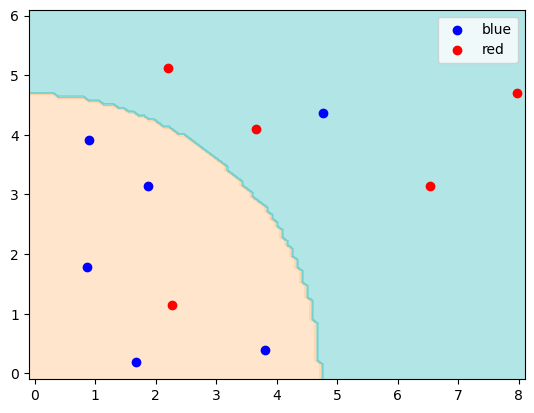

In [8]:

def cartesian_to_polar(points):
    points = np.atleast_2d(points)  # guarantee input is 2D shape
    x = points[:, 0]
    y = points[:, 1]
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return np.vstack([r, theta]).T

def polar_distance(X1, X2):
    X1_polar = cartesian_to_polar(X1)
    X2_polar = cartesian_to_polar(X2)
    return pairwise_distances(X1_polar, X2_polar, metric='manhattan')


knn = KNeighborsClassifier(n_neighbors=3, metric=polar_distance)
knn.fit(X, y)


def plot_decision_boundary(clf, axes):
    xp = np.linspace(axes[0], axes[1], 100)
    yp = np.linspace(axes[2], axes[3], 100)
    x1, y1 = np.meshgrid(xp, yp)
    xy = np.c_[x1.ravel(), y1.ravel()]
    y_pred = clf.predict(xy).reshape(x1.shape)
    custom_cmap = ListedColormap(['#ffcc99', '#66cccc'])
    plt.contourf(x1, y1, y_pred, alpha=0.5, cmap=custom_cmap)

plot_decision_boundary(knn, axes=[x_left, x_right, y_low, y_upper])
p1 = plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue')
p2 = plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red')
plt.legend([p1, p2], ['blue', 'red'], loc='upper right')
plt.show()

## 3. knn regression with different weights or not

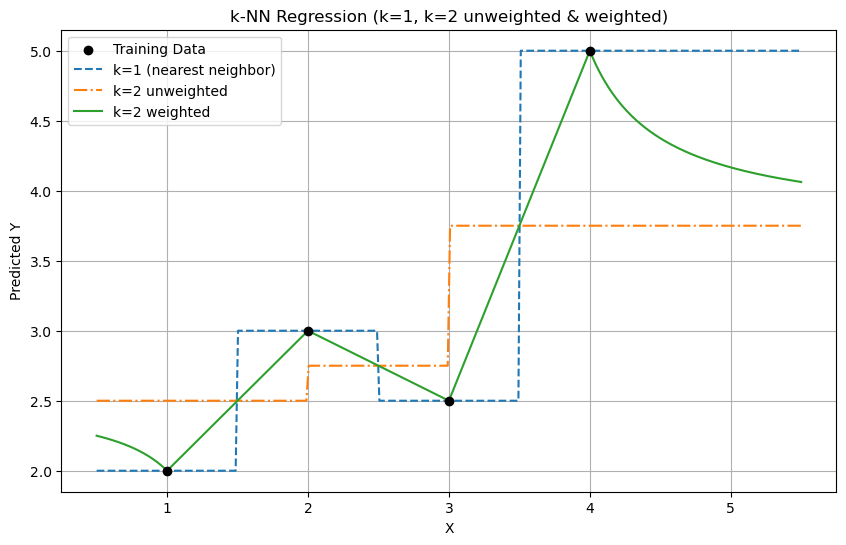

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# train data
X_train = np.array([1.0, 2.0, 3.0, 4.0])
Y_train = np.array([2.0, 3.0, 2.5, 5.0])
# X_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
# Y_train = np.array([2.0, 3.0, 2.5, 5.0, 3.5])

# k=1
def knn_k1(x_query):
    idx = np.argmin(np.abs(X_train - x_query))
    return Y_train[idx]

# k=2 unweighted
def knn_k2_unweighted(x_query):
    distances = np.abs(X_train - x_query)
    idxs = np.argsort(distances)[:2]
    return np.mean(Y_train[idxs])

# k=2 weighted
def knn_k2_weighted(x_query):
    distances = np.abs(X_train - x_query)
    idxs = np.argsort(distances)[:2]
    d1, d2 = distances[idxs[0]], distances[idxs[1]]
    y1, y2 = Y_train[idxs[0]], Y_train[idxs[1]]
    if d1 == 0: return y1
    if d2 == 0: return y2
    w1 = 1 / d1
    w2 = 1 / d2
    return (w1 * y1 + w2 * y2) / (w1 + w2)


x_range = np.linspace(0.5, 5.5, 300)
y_k1 = np.array([knn_k1(x) for x in x_range])
y_k2_unw = np.array([knn_k2_unweighted(x) for x in x_range])
y_k2_w = np.array([knn_k2_weighted(x) for x in x_range])


plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='black', label='Training Data', zorder=5)
plt.plot(x_range, y_k1, label='k=1 (nearest neighbor)', linestyle='--')
plt.plot(x_range, y_k2_unw, label='k=2 unweighted', linestyle='-.')
plt.plot(x_range, y_k2_w, label='k=2 weighted', linestyle='-')
plt.title("k-NN Regression (k=1, k=2 unweighted & weighted)")
plt.xlabel("X")
plt.ylabel("Predicted Y")
plt.legend()
plt.grid(True)
plt.show()

## 4. knn classfication prediction application instance

Predicted label: 1


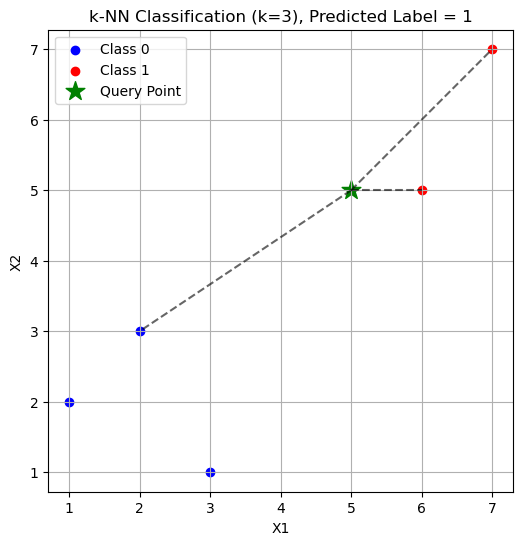

In [23]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

k = 3

def knn_classify(X_train, y_train, x_query, k=3):
    # calculate Euclidean distance b/w query point and each train point
    distances = np.linalg.norm(X_train - x_query, axis=1) 
    # select indices of k nearest train points
    nearest_indices = np.argsort(distances)[:k]
    # get labels of k nearest train points
    nearest_labels = y_train[nearest_indices]
    
    # eg. nearest_labels = [0, 1, 0] => Counter(nearest_labels) => Counter({0: 2, 1: 1})
    # Counter(...).most_common(n) get first n key-value elements with n biggest value
    # Counter({1: 1, 0: 2}).most_common(1) => [(0, 2)]
    most_common = Counter(nearest_labels).most_common(1)[0][0]
    return most_common, nearest_indices

X_train = np.array([
    [1, 2],
    [2, 3],
    [3, 1],
    [6, 5],
    [7, 7]
])
y_train = np.array([0, 0, 0, 1, 1])
x_query = np.array([5, 5])

predicted_label, neighbor_ids = knn_classify(X_train, y_train, x_query, k=k)
print(f"Predicted label: {predicted_label}")


plt.figure(figsize=(6, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Class 1')
plt.scatter(x_query[0], x_query[1], color='green', marker='*', s=200, label='Query Point')

for i in neighbor_ids:
    plt.plot([x_query[0], X_train[i, 0]], [x_query[1], X_train[i, 1]], 'k--', alpha=0.6)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'k-NN Classification (k={k}), Predicted Label = {predicted_label}')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()